# Series temporales

Cuando hablamos de datos, podemos referirnos a numerosos tipos de valores que reflejan un proceso en el mundo real. Podemos referirnos, por ejemplo, a un grupo de identificadores de vehículos, al texto contenido en un libro, o al número de días de lluvia al mes en un lugar. Estos datos vendrán en un formato concreto, que será consecuencia de su naturaleza. Los identificadores de vehículos, por ejemplo, serán matrículas que, en España, siguien el formato de cuatro números y tres letras consonantes, ordenadas según el momento de matriculación. En un libro, los datos serán caracteres que formarán palabras y que seguirán las reglas de sintaxis y semántica del idioma en el que estén escritos. Y los días de lluvia al mes, vendrán dados en forma de un entero referido a un índice temporal.

<img src="imagenes/lluvia.png" style="width:30em; margin: 0 auto;">

Este tipo de dato, es decir, una lista de valores de cualquier tipo (enteros, fraccionales, complejos, textuales, etc.) referidos a un índice temporal, recibe el nombre de <b>serie temporal</b>. Las series temporales se generan en procesos que evolucionan con el tiempo, y nos sirven para entender mejor dicha evolución, encontrar comportamientos periódicos, tendencias, e incluso, predecir el futuro.

---

# Índice
[El tiempo en Python](#El-tiempo-en-Python) <br/>
[El índice temporal](#El-índice-temporal) <br/>
[Representación de series temporales](#Representación-de-series-temporales) <br/>
[Conclusiones](#Conclusiones) <br/>

---

Las series temporales comparten algunas características con otro tipo de series; por ejemplo, podemos comprobar si existe una relación lineal entre dos variables si su correlación es alta. Las series temporales tienen, además otras propiedades específicas. En esta libreta, veremos cómo se realizan algunas operaciones típicas con series temporales con Pandas. Antes de eso, veremos cómo se representa un instante de tiempo en Python.

In [1]:
from datetime import datetime         # Nuevo: librería estándar para usar variables que reflejan el tiempo
import pandas as pd
import matplotlib.pyplot as plt     
import numpy as np

## El tiempo en Python

Antes de ver las series temporales, veamos cómo se representa el tiempo en Python. Para ello, Python provee la <a href="https://docs.python.org/3/library/datetime.html">librería Datetime</a> que forma parte de las librerías estándar. Como su nombre indica, con Datetime, trabajamos con objetos que incluyen la fecha y la hora:

In [2]:
instante = datetime(day=6, month=9, year=2021, hour=17, minute=46, second=12)
print(instante)

2021-09-06 17:46:12


Podemos también obtener el instante actual:

In [3]:
ahora = datetime.now()
print(ahora)

2022-06-10 16:20:57.907968


Y realizar operaciones con estos objetos <code>datetime</code>:

In [4]:
ahora - instante

datetime.timedelta(days=276, seconds=81285, microseconds=907968)

El resultado es un objeto <code>timedelta</code> que representa un intervalo temporal relativo en lugar de un instante absoluto.

A menudo, tendremos que pasar de texto a objetos temporales (por ejemplo, al leer un fichero). Para ello la función <code>strptime</code> toma a su entrada una cadena y devuelve un objeto <code>datetime</code>. Si bien hay formatos estándar para escribir la fecha, a veces tendremos que indicarle explícitamente a Datetime dónde encontrar el día, mes, año, etc. Veamos un ejemplo:

In [5]:
fecha_texto = "06/09/2021 17:46:12"
formato = "%d/%m/%Y %H:%M:%S"
fecha_dt = datetime.strptime(fecha_texto, formato)

In [6]:
fecha_dt

datetime.datetime(2021, 9, 6, 17, 46, 12)

En este código, <code>fecha_texto</code> contiene la fecha en el formato <code>"<i>día / mes / año  horas : minutos : segundos</i>"</code>. Eso es precisamente lo que indica la cadena <code>formato</code>. Cada caracter precedido por <code>%</code> indica qué elemento de la fecha corresponde a esa posición. En <a href="https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes">la documentación</a> del módulo Datetime, se puede encontrar un resumen de todos los caracteres que podemos usar indicando distintos formatos.

<p style="background-color:lightpink; padding:1em"><b>Ejercicio 1</b><br/>
    Cree dos variables temporales con el instante actual (<code>datetime.now()</code>), separados por varios segundos. A continuación, calcule el objeto <code>timedelta</code> que muestre la diferencia temporal entre ambos.
</p>

## El índice temporal

Como vimos al introducir Pandas, un objeto <code>Series</code> se compone de un índice y un array de datos. La única diferencia entre una serie genérica y una serie temporal (desde el punto de vista de la programación) es el formato del índice. Pandas proporciona una serie de funciones que facilitan la generación y uso de índices temporales. El centro de esta funcionalidad es el objeto <code>DatetimeIndex</code>, que a su vez se usa para indexar objetos <code>Series</code> y <code>DataFrame</code>.

Veamos el ejemplo más sencillo, que es el de la creación de un índice temporal entre dos fechas. Para ello, Pandas ofrece la función <code>date_range</code>, que devuelve un objeto <code>DatetimeIndex</code>:

In [7]:
index = pd.date_range(start=instante, end=ahora, freq='H')

In [8]:
index

DatetimeIndex(['2021-09-06 17:46:12', '2021-09-06 18:46:12',
               '2021-09-06 19:46:12', '2021-09-06 20:46:12',
               '2021-09-06 21:46:12', '2021-09-06 22:46:12',
               '2021-09-06 23:46:12', '2021-09-07 00:46:12',
               '2021-09-07 01:46:12', '2021-09-07 02:46:12',
               ...
               '2022-06-10 06:46:12', '2022-06-10 07:46:12',
               '2022-06-10 08:46:12', '2022-06-10 09:46:12',
               '2022-06-10 10:46:12', '2022-06-10 11:46:12',
               '2022-06-10 12:46:12', '2022-06-10 13:46:12',
               '2022-06-10 14:46:12', '2022-06-10 15:46:12'],
              dtype='datetime64[ns]', length=6647, freq='H')

Los parámetros <code>start</code> y <code>end</code>hacen lo que su nombre indica, es decir, establecen los límites inferior y superior del intervalo. El parámetro <code>freq</code> indica la frecuencia, es decir, la separación entre las entradas del índice. En este caso, hemos usado <code>'H'</code>, que indica que será de una frecuencia horaria. En <a href="https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases">la documentación</a>, podemos ver muchos otros posibles valores para este parámetro. Una vez que tenemos el índice, podemos usarlo para generar una Serie vacía o con datos:

In [9]:
serie_temporal = pd.Series(index=index, data=np.random.randn( len(index) ) )
serie_temporal

2021-09-06 17:46:12   -1.423629
2021-09-06 18:46:12    0.502531
2021-09-06 19:46:12   -1.174759
2021-09-06 20:46:12   -0.771725
2021-09-06 21:46:12   -0.580306
                         ...   
2022-06-10 11:46:12   -1.108858
2022-06-10 12:46:12    0.192184
2022-06-10 13:46:12    0.458053
2022-06-10 14:46:12   -0.748476
2022-06-10 15:46:12   -1.016483
Freq: H, Length: 6647, dtype: float64

En este ejemplo, hemos rellenado la serie con datos aleatorios, usando un array nuevo con tantos valores aleatorios como elementos tiene el índice (<code>len(index)</code>).

Otra forma de generar un <code>DatetimeIndex</code>, si conocemos de antemano la longitud de los datos que queremos indexar es usando el parámetro <code>periods</code>, en lugar de <code>end</code>:

In [10]:
index = pd.date_range(start=instante, periods=24, freq='H')

In [11]:
serie_temporal = pd.Series(index=index, data=np.random.randn(24))

In [12]:
serie_temporal

2021-09-06 17:46:12   -0.290324
2021-09-06 18:46:12   -0.266994
2021-09-06 19:46:12    2.117452
2021-09-06 20:46:12    0.395809
2021-09-06 21:46:12    0.130095
2021-09-06 22:46:12   -0.699598
2021-09-06 23:46:12    1.084235
2021-09-07 00:46:12    0.685500
2021-09-07 01:46:12   -0.754498
2021-09-07 02:46:12    2.258867
2021-09-07 03:46:12    1.677078
2021-09-07 04:46:12   -1.159437
2021-09-07 05:46:12    0.514265
2021-09-07 06:46:12   -0.509223
2021-09-07 07:46:12   -0.839751
2021-09-07 08:46:12    0.370604
2021-09-07 09:46:12   -1.043131
2021-09-07 10:46:12    0.459761
2021-09-07 11:46:12   -2.092575
2021-09-07 12:46:12    0.214209
2021-09-07 13:46:12   -0.074305
2021-09-07 14:46:12   -0.069763
2021-09-07 15:46:12    0.270548
2021-09-07 16:46:12    0.203658
Freq: H, dtype: float64

Dado que los <code>DataFrame</code> son colecciones de <code>Series</code> que comparten índices, éstos también pueden usar índices temporales. Veamos un ejemplo de código que genera un <code>DataFrame</code> vacío.

In [13]:
df = pd.DataFrame(index=index, columns=['valor aleatorio', 'valor aleatorio x10'])
df['valor aleatorio'] = np.random.randn(24)
df['valor aleatorio x10'] = df['valor aleatorio'] * 10

In [14]:
df

,valor aleatorio,valor aleatorio x10
2021-09-06 17:46:12,1.975338,19.753382
2021-09-06 18:46:12,-1.626029,-16.260291
2021-09-06 19:46:12,0.005038,0.050382
2021-09-06 20:46:12,-0.243775,-2.437752
2021-09-06 21:46:12,0.113013,1.130130
2021-09-06 22:46:12,0.617905,6.179051
2021-09-06 23:46:12,-0.224015,-2.240154
2021-09-07 00:46:12,-1.414713,-14.147128
2021-09-07 01:46:12,-1.236320,-12.363202
2021-09-07 02:46:12,0.141199,1.411993


El objeto <code>DatetimeIndex</code> permite muchas más operaciones. En <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html">este enlace</a> se puede leer mucho más sobre este objeto. Veremos algunas funcionalidades más adelante.

<div style="background-color:lightpink; padding:1em">
    <p><b>Ejercicio 2</b><br/>
        Cree una variable temporal con el instante actual. A continuación, cree un índice horario con cinco intervalos, siendo el primero el actual, y con una separación de una hora. Use dicho índice para crear un objeto <code>Series</code> que tenga como datos un array con los valores del 0 al 4, siendo 0 el valor correspondiente al inicio del índice.
    </p>
    <table>
        <tr><th>Índice</th><th>Valor</th></tr>
        <tr><td>2021-09-06 17:46:12</td><td>0</td></tr>
        <tr><td>2021-09-06 18:46:12</td><td>1</td></tr>
        <tr><td>2021-09-06 19:46:12</td><td>2</td></tr>
        <tr><td>2021-09-06 20:46:12</td><td>3</td></tr>
        <tr><td>2021-09-06 21:46:12</td><td>4</td></tr>
    </table>
</div>

## Representación de series temporales

Las series, en general, se pueden representar de muchas maneras: gráficos de barras, de línea, de sectores, etc. Python tiene la librería Matplotlib para representaciones gráficas los datos. Pandas integra las funciones más útiles para series y tablas. En esta sección, nos centraremos en las gráficas de líneas y de barras, que son la representación natural de las series temporales. Por supuesto, esta representación se puede aplicar también a series no temporales. Hay muchas formas de usar Matplotlib; pero nosotros empezaremos por la más fácil, que es usando las funciones de Pandas. Más adelante, veremos representaciones más complejas que necesitan el uso de Matplotlib puro.

El uso más sencillo es la representación de una serie:

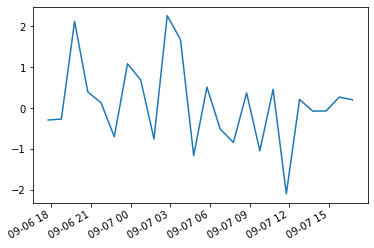

In [15]:
serie_temporal.plot()
plt.show()

Este código es muy fácil de entender. En la primera línea se invoca al método <code>plot</code>, que toma la serie y representa sus valores en función del índice. Esta función automatiza muchísimos ajustes, tales como la escala, los valores representados en las etiquetas de eje, etc. Con las funciones de Matplotlib podemos personalizarlo <i>todo</i>; pero de momento, veremos algunos parámetros que podemos ajustar con Pandas. La segunda línea, si bien no es del todo necesaria en Jupyter, es conveniente. Sirve para dibujar la gráfica que previamente hemos configurado. Veremos más detalles más adelante; de momento, sólo es importante saber que, siempre que hagamos una representación gráfica, hay que incluirla justo en el punto en el que queremos que se muestre la gráfica.

Pandas permite personalizar algunos parámetros, como el color o los marcadores:

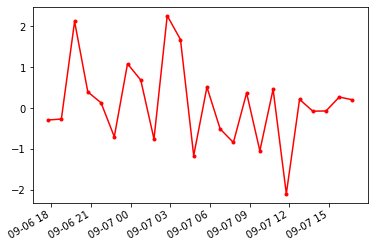

In [16]:
serie_temporal.plot(color='red', marker='.')
plt.show()

Por defecto, Pandas pinta una gráfica de líneas. Para conseguir una de barras, tenemos que usar el parámetro <code>kind</code>:

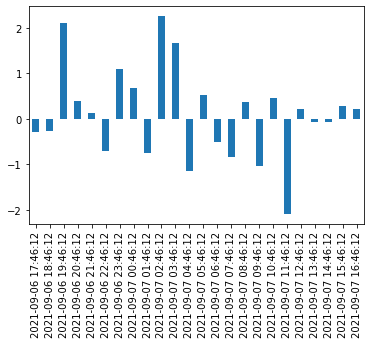

In [17]:
serie_temporal.plot(kind='bar')
plt.show()

Las opciones de representación gráfica están documentadas <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html">aquí</a>.

Veamos qué sucede cuando queremos representar gráficamente un <code>DataFrame</code>:

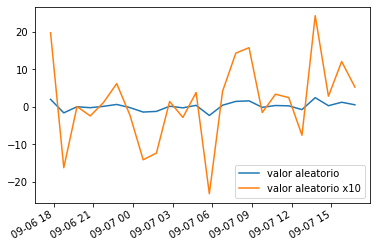

In [18]:
df.plot()
plt.show()

Como se puede observar, Pandas representa cada serie con un color distinto y además añade un índice. No obstante, raramente querremos representar un <code>DataFrame</code> completo, sino más bien sus columnas de forma individual o en subgrupos.

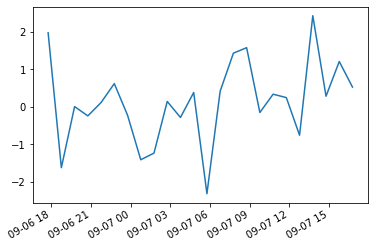

In [19]:
df.loc[:,'valor aleatorio'].plot()
plt.show()

<p style="background-color:lightpink; padding:1em"><b>Ejercicio 3</b><br/>
    Represente en forma de gráfico de barras la serie que generó en el Ejercicio 2.
</p>

## Conclusiones

En esta libreta hemos visto las series temporales, a través de los siguientes puntos:
- El objeto <code>datetime</code>, que representa instantes temporales.
- El índice temporal en Pandas, que permite generar <code>Series</code> y <code>DataFrame</code> de datos temporales.
- La representación de series temporales con Pandas

Hay algunas cosas que por extensión, no incluiremos en este curso, como por ejemplo, <a href="https://www.geeksforgeeks.org/basic-datetime-operations-in-python/">las operaciones con objetos <code>datetime</code></a>, o las <a href="https://saralgyaan.com/posts/plot-time-series-in-python-matplotlib-tutorial-chapter-8/">optimizaciones de Matplotlib</a> para ejes temporales. Además, en <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html">la documentación de Pandas</a> podremos encontrar detalles para trabajar con series temporales más allá de las funciones básicas.